in this notebook we will have a look at how much different cities were impacted
among the cities which generated most revenue before crisis how much were they impacted due to crisis
did avg order value drop
is delivery time impacted more in certain cities
is rating impacted more in certain cities
is order_cancellation rate impacted more in certain cities
what negative words were most likely there in different orders in each city
which cities has largest comeback potiential
w

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
def load_data(table):
    df = pd.read_csv(f'rpc_18_inputs_for_participants//rpc_18_inputs_for_participants//RPC_18_Datasets//{table}.csv')
    return df
def save_data(df,name):
    df.to_csv(f'rpc_18_inputs_for_participants//rpc_18_inputs_for_participants//RPC_18_Datasets//{name}.csv')
    

In [4]:
files = ['dim_customer','dim_delivery_partner_','dim_menu_item','dim_restaurant','fact_delivery_performance','fact_order_items','fact_orders','fact_ratings']

In [5]:
#monthly order count per city
orders = load_data('fact_orders')

In [6]:
orders.head()

,order_id,customer_id,restaurant_id,delivery_partner_id,order_timestamp,subtotal_amount,discount_amount,delivery_fee,total_amount,is_cod,is_cancelled
0,ORD202501023439,CUST181110,REST08622,DP05541,2025-01-01 12:00:00,471.62,35.44,30.56,466.74,N,N
1,ORD202501012051,CUST025572,REST02383,DP08091,2025-01-01 12:00:00,255.68,0.00,27.45,283.13,Y,N
2,ORD202501019281,CUST179306,REST14069,DP02021,2025-01-01 12:00:00,428.38,0.00,26.23,454.61,N,N
3,ORD202501000124,CUST191820,REST19745,DP13859,2025-01-01 12:00:00,260.81,0.00,32.75,293.56,N,N
4,ORD202501006518,CUST033760,REST12962,DP09615,2025-01-01 12:00:00,280.33,0.00,25.57,305.90,N,N


In [7]:
orders['order_timestamp'] = pd.to_datetime(orders['order_timestamp'])

In [8]:
orders['month'] = orders['order_timestamp'].dt.month

In [9]:
restaurant = load_data('dim_restaurant')

In [10]:
restaurant.head()

,restaurant_id,restaurant_name,city,cuisine_type,partner_type,avg_prep_time_min,is_active
0,REST12962,Flavours of Sweets Palace,Bengaluru,Chinese,Restaurant,26-40,N
1,REST14069,Royal Biryani Darbar,Ahmedabad,Fast Food,Restaurant,16-25,Y
2,REST08622,Spicy Wraps Point,Mumbai,North Indian,Restaurant,16-25,Y
3,REST19745,Delhi Express Palace,Ahmedabad,Pizza,Cloud Kitchen,16-25,Y
4,REST02383,Namma Mess Delight,Mumbai,Healthy,Restaurant,26-40,Y


In [11]:
orders_with_city = orders.merge(restaurant[['restaurant_id','city']],on='restaurant_id')

In [12]:
orders_with_city.groupby(['city','month'])[['order_id']].count().unstack()

order_id                                                
month            1     2     3     4     5     6     7     8     9
city                                                              
Ahmedabad     1990  1850  1994  1742  1779   745   747   701   723
Bengaluru     5804  5547  5798  5388  5682  2257  2144  2160  2139
Chennai       2349  2416  2373  2182  2217   902   873   874   814
Delhi         3445  3354  3548  3211  3279  1421  1309  1225  1346
Hyderabad     2322  2299  2397  2186  2342   938   869   841   941
Kolkata       2253  2065  2156  1897  2099   876   779   814   757
Mumbai        3532  3339  3414  3190  3334  1393  1362  1236  1273
Pune          1844  1797  1863  1670  1859   761   735   704   701

In [13]:
pre_crisis_data = orders_with_city[orders_with_city['month']<=5]
post_crisis_data = orders_with_city[orders_with_city['month']>5]

In [14]:
# total orders placed per city, cancelled, and delivered pre crisis vs post crisis

In [15]:
pre_crisis_orders = pre_crisis_data.groupby('city')[['order_id']].count().rename(columns={'order_id':'total_order_pre_crisis'}).sort_values(by='total_order_pre_crisis',ascending=False)


In [16]:
# top cities
pre_crisis_orders.head(3)

,total_order_pre_crisis
city,
Bengaluru,28219
Delhi,16837
Mumbai,16809


In [17]:
post_crisis_orders = post_crisis_data.groupby('city')[['order_id']].count().rename(columns={'order_id':'total_order_crisis'}).sort_values(by='total_order_crisis',ascending=False)
post_crisis_orders

,total_order_crisis
city,
Bengaluru,8700
Delhi,5301
Mumbai,5264
Hyderabad,3589
Chennai,3463
Kolkata,3226
Ahmedabad,2916
Pune,2901


In [18]:
# plot the total orders placed per city pre crisis vs post crisis side by side
agg = pd.concat([pre_crisis_orders,post_crisis_orders],axis=1).fillna(0)
agg

,total_order_pre_crisis,total_order_crisis
city,,
Bengaluru,28219,8700
Delhi,16837,5301
Mumbai,16809,5264
Hyderabad,11546,3589
Chennai,11537,3463
Kolkata,10470,3226
Ahmedabad,9355,2916
Pune,9033,2901


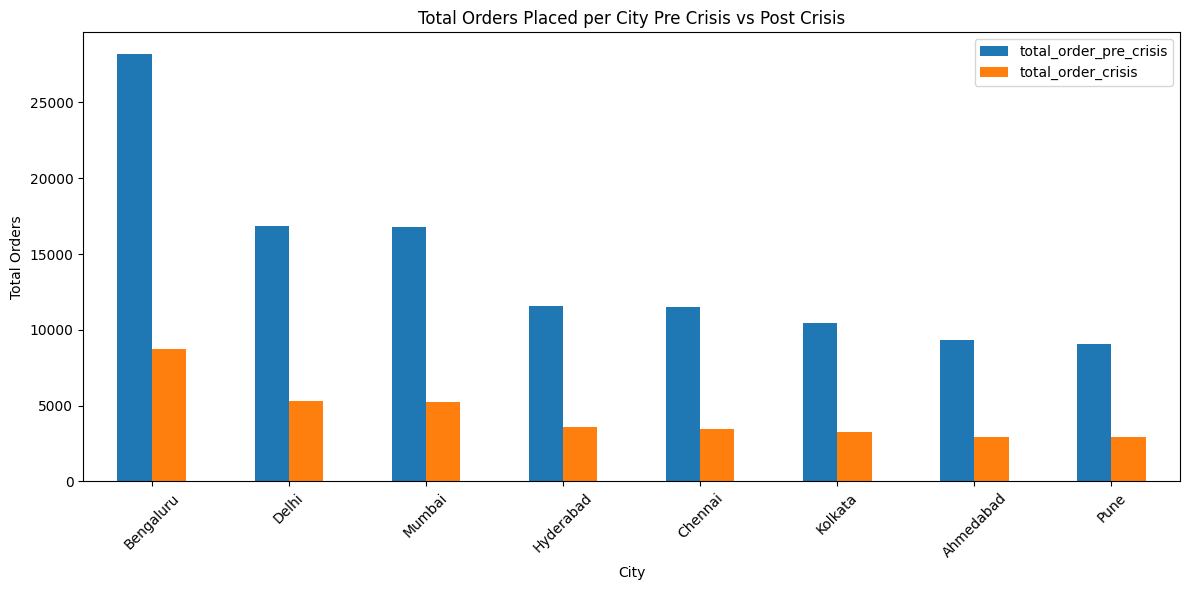

In [19]:
# plo agg
agg.plot(kind='bar',figsize=(12,6))
plt.title('Total Orders Placed per City Pre Crisis vs Post Crisis')
plt.xlabel('City')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [20]:
# we know there will be similar trend in orders values, cancellation rate pre crisis vs crisis per city
# lets just prove it
# and then move on to finding real problems in each city

lets have a look at whether there is some relation btw city and churn (customer, restaurnat), delivery performance, drop in ratings, drop in orders

lets start with restaurant churn

which cities has highest churn

is there relation btw restaurant churn and city
Null Hypothesis: there is no relation btw city and chrun
Alternate Hypothesis: there is some statistical relation

In [28]:
restaurant.info()

<class 'pandas.DataFrame'>
RangeIndex: 19995 entries, 0 to 19994
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   restaurant_id      19995 non-null  str  
 1   restaurant_name    19995 non-null  str  
 2   city               19995 non-null  str  
 3   cuisine_type       19995 non-null  str  
 4   partner_type       19995 non-null  str  
 5   avg_prep_time_min  19995 non-null  str  
 6   is_active          19995 non-null  int64
dtypes: int64(1), str(6)
memory usage: 1.1 MB


In [24]:
# convert is_active status to binary
restaurant['is_active'] = restaurant['is_active'].map({'Y':1,'N':0})

In [ ]:
restaurant.groupby('city')[['is_active']].mean()

# finding churn like this does not give enough information

In [29]:
all_restaurant_id = restaurant['restaurant_id']
len(all_restaurant_id)

19995

In [46]:
# lets try to find which restaurant did not get any order during crisis
active_restaurant=post_crisis_data['restaurant_id'].unique()

In [43]:
restaurant_churn = all_restaurant_id[~all_restaurant_id.isin(active_restaurant)]

In [51]:
restaurant_churn

0        REST12962
12       REST00225
16       REST19508
22       REST16824
23       REST02776
           ...    
19922    REST06558
19940    REST14311
19967    REST00998
19987    REST13159
19991    REST11150
Name: restaurant_id, Length: 3409, dtype: str

In [53]:
restaurant_corrected = restaurant.copy()
restaurant_corrected['is_active'] = restaurant_corrected['restaurant_id'].isin(restaurant_churn).map({True: 'N', False: 'Y'})
restaurant_corrected.head()

,restaurant_id,restaurant_name,city,cuisine_type,partner_type,avg_prep_time_min,is_active
0,REST12962,Flavours of Sweets Palace,Bengaluru,Chinese,Restaurant,26-40,N
1,REST14069,Royal Biryani Darbar,Ahmedabad,Fast Food,Restaurant,16-25,Y
2,REST08622,Spicy Wraps Point,Mumbai,North Indian,Restaurant,16-25,Y
3,REST19745,Delhi Express Palace,Ahmedabad,Pizza,Cloud Kitchen,16-25,Y
4,REST02383,Namma Mess Delight,Mumbai,Healthy,Restaurant,26-40,Y


In [62]:
# we need to sav this for future use
save_data(restaurant_corrected,'restaurant_corrected')

In [67]:
contingency_table = pd.crosstab(restaurant_corrected['city'], restaurant_corrected['is_active'])
contingency_table['churn_percentage'] = contingency_table['N']/(contingency_table['N']+contingency_table['Y'])
contingency_table

is_active,N,Y,churn_percentage
city,,,
Ahmedabad,258,1372,0.158282
Bengaluru,857,4106,0.172678
Chennai,349,1672,0.172687
Delhi,496,2470,0.167229
Hyderabad,337,1690,0.166256
Kolkata,327,1508,0.178202
Mumbai,517,2446,0.174485
Pune,268,1322,0.168553


In [54]:
from scipy.stats import chi2_contingency

In [60]:
contingency_table = pd.crosstab(restaurant_corrected['city'], restaurant_corrected['is_active'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(contingency_table)
print('Chi-square test for city:')
print(f'Chi-square statistic: {chi2}, p-value: {p}')
if p < 0.05:
    print(f'Result: Reject the null hypothesis. There is a significant association between city and severity level.\n')
else:
    print(f'Result: Fail to reject the null hypothesis. No significant association between city and severity level.\n')

is_active    N     Y
city                
Ahmedabad  258  1372
Bengaluru  857  4106
Chennai    349  1672
Delhi      496  2470
Hyderabad  337  1690
Kolkata    327  1508
Mumbai     517  2446
Pune       268  1322
Chi-square test for city:
Chi-square statistic: 3.582875794116427, p-value: 0.8263710117439402
Result: Fail to reject the null hypothesis. No significant association between city and severity level.



now it is proven that there is no significant relation among city and restaurant churn i.e partners have left system acroos equally so there is systematic error not a problem relevent to some geographic area